In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

In [2]:
# Load a dataset

dataset_train = h5py.File('datasets/train_set.h5', mode='r')
train_set_x = np.array(dataset_train['train_set_x'][:])
train_set_y = np.array(dataset_train['train_set_y'][:])

dataset_test = h5py.File('datasets/test_set.h5', mode='r')
test_set_x = np.array(dataset_test['test_set_x'][:])
test_set_y = np.array(dataset_test['test_set_y'][:])

classes = np.array(dataset_test['list_classes'][:])

Y_train = train_set_y.reshape(1, train_set_y.shape[0])
Y_test = test_set_y.reshape(1, test_set_y.shape[0])

In [3]:
# Flatten the pixels and reshape into unrowed pixels by m-number of examples
train_set_x_unrowed = train_set_x.reshape(train_set_x.shape[1] * train_set_x.shape[2] * train_set_x.shape[3], train_set_x.shape[0])
test_set_x_unrowed = test_set_x.reshape(test_set_x.shape[1] * test_set_x.shape[2] * test_set_x.shape[3], test_set_x.shape[0])

In [4]:
# Standardize the data set
X_train = train_set_x_unrowed / 255
X_test = test_set_x_unrowed / 255

In [5]:
# Helper function to calculate the sigmoid
def sigmoid(z):
    sig = 1 / (1 + np.exp(-z))
    
    return sig

In [6]:
# Helper function to initialize weights and bias with zero
def initialize_parameters(dimension):
    weights = np.zeros((dimension, 1))
    bias = 0
    
    return weights, bias

In [7]:
# Helper function to do a single forward pass
def forward_propagate(X, Y, weights, bias):
    # Get the number of training examples
    m = X.shape[1]
    
    # Calculate the z
    z = np.dot(weights.T, X) + bias
    
    # Calculate activation A using sigmoid activation
    A = sigmoid(z)
    
    # Calculate for the cost
    cost = (-1/m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    
    cost = np.squeeze(cost)
    
    return A, cost

In [8]:
# Helper function to do a single backward pass
def backward_propagate(X, Y, A):
    # Calculate for the derivatives
    m = X.shape[1]
    dz = A - Y
    dw = (1/m) * np.dot(X, dz.T)
    db = (1/m) * np.sum(dz)
    
    return dw, db

In [9]:
# Helper function to optimize weights and bias using gradient descent algorithm
def gradient_descent(X, Y, weights, bias, iterations, learning_rate, print_cost=False):
    costs = []
    
    for i in range(iterations):
        # Compute for cost and gradient using propagate
        A, cost = forward_propagate(X, Y, weights, bias)
        dw, db = backward_propagate(X, Y, A)
        
        # Update weights and bias parameters
        weights = weights - learning_rate * dw
        bias = bias - learning_rate * db
        
        # Record cost
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
            
    return weights, bias, dw, db, costs

In [10]:
def predict(X, weights, bias):
    m = X.shape[1]
    Y_pred = np.zeros((1, m))
    
    A = sigmoid(np.dot(weights.T, X) + bias)
    
    for i in range(A.shape[1]):
        if A[0,i] <= 0.5:
            Y_pred[0,i] = 0
        else:
            Y_pred[0,i] = 1
    
    return Y_pred

In [11]:
def logistic_regression_model(X_train, Y_train, X_test, Y_test, iterations=2000, learning_rate=0.5, print_cost=False):
    weights, bias = initialize_parameters(X_train.shape[0])
    weights, bias, dw, db, costs = gradient_descent(X_train, Y_train, weights, bias, iterations, learning_rate, print_cost)
    
    Y_pred_train = predict(X_train, weights, bias)
    Y_pred_test = predict(X_test, weights, bias)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_pred_test - Y_test)) * 100))

    
    model = {"costs": costs,
         "Y_pred_train": Y_pred_train, 
         "Y_pred_test" : Y_pred_test, 
         "weights" : weights, 
         "bias" : bias,
         "learning_rate" : learning_rate,
         "iterations": iterations}
    
    return model

In [12]:
model = logistic_regression_model(X_train, Y_train, X_test, Y_test, iterations=2000, learning_rate=0.005, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.709726
Cost after iteration 200: 0.657712
Cost after iteration 300: 0.614611
Cost after iteration 400: 0.578001
Cost after iteration 500: 0.546372
Cost after iteration 600: 0.518331
Cost after iteration 700: 0.492852
Cost after iteration 800: 0.469259
Cost after iteration 900: 0.447139
Cost after iteration 1000: 0.426262
Cost after iteration 1100: 0.406617
Cost after iteration 1200: 0.388723
Cost after iteration 1300: 0.374678
Cost after iteration 1400: 0.365826
Cost after iteration 1500: 0.358532
Cost after iteration 1600: 0.351612
Cost after iteration 1700: 0.345012
Cost after iteration 1800: 0.338704
Cost after iteration 1900: 0.332664
train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


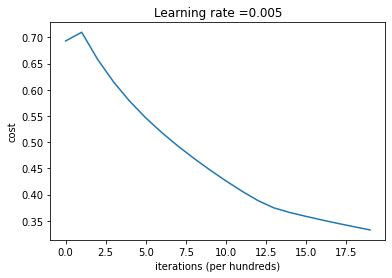

In [13]:
# Plot learning curve (with costs)
costs = np.squeeze(model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(model["learning_rate"]))
plt.show()

In [14]:
iterations = [2000, 3000, 4000]
models = {}
for i in iterations:
    print("iterations: " + str(i))
    models[str(i)] = logistic_regression_model(X_train, Y_train, X_test, Y_test, iterations=i, learning_rate=0.005, print_cost=False)
    print('\n****************************************\n')

iterations: 2000
train accuracy: 91.38755980861244 %
test accuracy: 34.0 %

****************************************

iterations: 3000
train accuracy: 93.77990430622009 %
test accuracy: 34.0 %

****************************************

iterations: 4000
train accuracy: 97.12918660287082 %
test accuracy: 34.0 %

****************************************



In [15]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("learning rate: " + str(i))
    models[str(i)] = logistic_regression_model(X_train, Y_train, X_test, Y_test, iterations=2000, learning_rate=i, print_cost=False)
    print('\n****************************************\n')

learning rate: 0.01
train accuracy: 73.6842105263158 %
test accuracy: 34.0 %

****************************************

learning rate: 0.001
train accuracy: 74.64114832535886 %
test accuracy: 34.0 %

****************************************

learning rate: 0.0001
train accuracy: 66.98564593301435 %
test accuracy: 34.0 %

****************************************

